# データの整形

In [14]:
import p01_CellSorter_Data

In [15]:
p01 = p01_CellSorter_Data.FlowCytometryProcessor(
    stations=[1,4,8], 
    base_path="/Users/henmi_note/Desktop/CellSorter/CellSorter_rawdata", 
    return_TIME=False
)

In [16]:
data = p01.process_all()

Station 1, File: /Users/henmi_note/Desktop/CellSorter/CellSorter_rawdata/2024-05-24/user1_Experiment 2024_05_24 142307_Sample Group - 1_s1-10_Data Source - 1.csv - Dropped: 0.90
Station 1, File: /Users/henmi_note/Desktop/CellSorter/CellSorter_rawdata/2024-06-11/user1_Experiment 2024_06_11 112644_Sample Group - 1_s1-10-0610_Data Source - 1.csv - Dropped: 0.91
Station 1, File: /Users/henmi_note/Desktop/CellSorter/CellSorter_rawdata/2024-07-05/user1_Experiment 2024_07_05 132718_Sample Group - 1_s1-10_Data Source - 1.csv - Dropped: 0.89
Station 1, File: /Users/henmi_note/Desktop/CellSorter/CellSorter_rawdata/2024-08-06/user1_Experiment 2024_08_06 104937_Sample Group - 1_s1-10_Data Source - 1.csv - Dropped: 0.89
Station 1, File: /Users/henmi_note/Desktop/CellSorter/CellSorter_rawdata/2024-11-13/user1_Experiment 2024_11_13 101120_Sample Group - 1_s1_Data Source - 1_renamed.csv - Dropped: 0.89
Station 4, File: /Users/henmi_note/Desktop/CellSorter/CellSorter_rawdata/2024-05-24/user1_Experiment

In [38]:
data

,FSC-A,BSC-A,FITC-A-Compensated,PE-A-Compensated,PI-A-Compensated,APC-A-Compensated,PerCP-Cy5.5-A-Compensated,PE-Cy7-A-Compensated,DATE,STATION_label,ward
0,4.935901,2.973378,0.112051,0.094387,0.188352,0.613157,0.584953,0.447269,2024-05-24,1,2024-05-s1
1,4.817196,3.828567,0.147545,0.141615,0.175614,0.127807,0.218026,0.150366,2024-05-24,1,2024-05-s1
2,5.161297,4.060008,0.396137,0.384756,0.415069,0.713818,0.701033,0.579645,2024-05-24,1,2024-05-s1
3,5.313388,3.406636,0.179266,0.202637,0.225900,0.686907,0.674077,0.535217,2024-05-24,1,2024-05-s1
4,5.319643,4.491780,0.268642,0.231968,0.199751,0.437100,0.430082,0.314453,2024-05-24,1,2024-05-s1
...,...,...,...,...,...,...,...,...,...,...,...
9995,4.950159,3.726249,0.238037,0.193131,0.168490,0.664011,0.654417,0.516460,2024-11-13,8,2024-11-s8
9996,5.051621,3.256499,0.349543,0.185472,0.225999,0.402173,0.370035,0.258159,2024-11-13,8,2024-11-s8
9997,4.789524,2.553392,0.189430,0.164250,0.137550,0.607343,0.599220,0.451029,2024-11-13,8,2024-11-s8
9998,4.975425,4.475022,0.293013,0.229782,0.267030,0.656510,0.644372,0.506078,2024-11-13,8,2024-11-s8


# GMM-loop実験

In [18]:
import GMM_loop

result = GMM_loop.experiments(
        df = data,
        N = 2, # 移動回数
        n_components=2, #クラスタ数
        save_dir="tmp_Dec27",
        alpha=0.5,
        random_state_list=[0], # ランダムステート数
        is_dummy=True
    )


In [39]:
result

{'X': {0: {0:          FSC-A     BSC-A  FITC-A-Compensated  PE-A-Compensated  \
   0     5.073493  3.304668            0.105070          0.043963   
   1     4.863641  3.921896            0.149405          0.125993   
   2     5.224467  4.146308            0.404148          0.374117   
   3     5.440787  3.621815            0.186992          0.171847   
   4     5.434948  4.754410            0.283215          0.225013   
   ...        ...       ...                 ...               ...   
   9995  5.079512  4.032279            0.271359          0.224602   
   9996  5.184933  3.592337            0.373758          0.205101   
   9997  4.918877  2.859422            0.222751          0.195721   
   9998  5.104778  4.781052            0.326335          0.261252   
   9999  5.111208  4.262683            0.336942          0.334442   
   
         PI-A-Compensated  APC-A-Compensated  PerCP-Cy5.5-A-Compensated  \
   0             0.152858           0.637714                   0.618338   
   1   

In [34]:
result["diff"][0].keys()

dict_keys([0, 1])

In [36]:
random_states = [0]
loops = [0, 1]
for random_state in random_states:
    for loop in loops:
        result["X"][random_state][loop].to_csv(
            f"tmp_{random_state}_{loop}.csv.gz",
            compression="gzip"
        )

In [37]:
result["cluster"]

{0: {0: 0       1
  1       0
  2       1
  3       1
  4       0
         ..
  9995    1
  9996    0
  9997    1
  9998    1
  9999    1
  Name: cluster, Length: 142118, dtype: int64,
  1: 0       0
  1       1
  2       0
  3       0
  4       1
         ..
  9995    0
  9996    1
  9997    0
  9998    0
  9999    0
  Name: cluster, Length: 142118, dtype: int64}}

In [43]:
result["cluster"][0][1]

0       0
1       1
2       0
3       0
4       1
       ..
9995    0
9996    1
9997    0
9998    0
9999    0
Name: cluster, Length: 142118, dtype: int64

In [44]:
import p03_GMM_vis

p03_GMM_vis.Sankey_diagram(
    result["cluster"][0][0],
    result["cluster"][0][1]
)

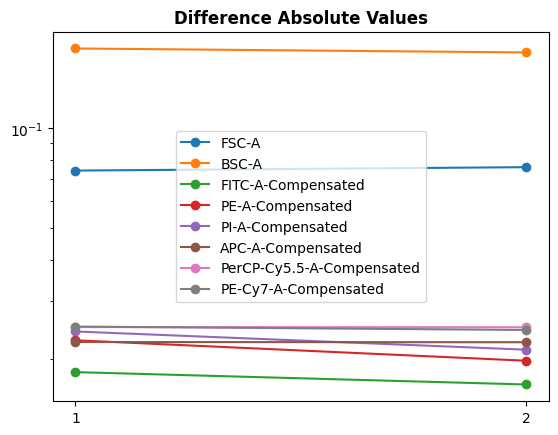

In [45]:
p03_GMM_vis.Absolute_distance(diff_dict=result["diff"][0])

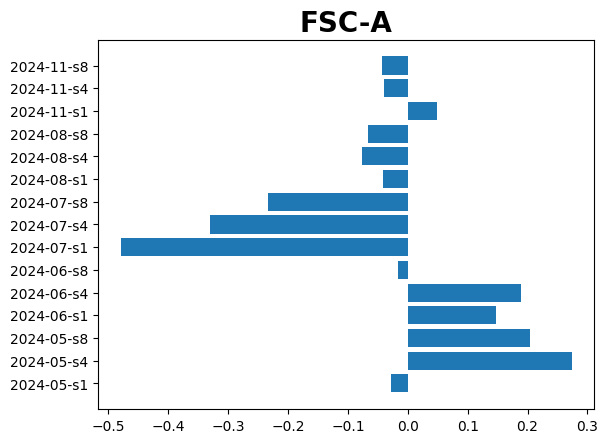

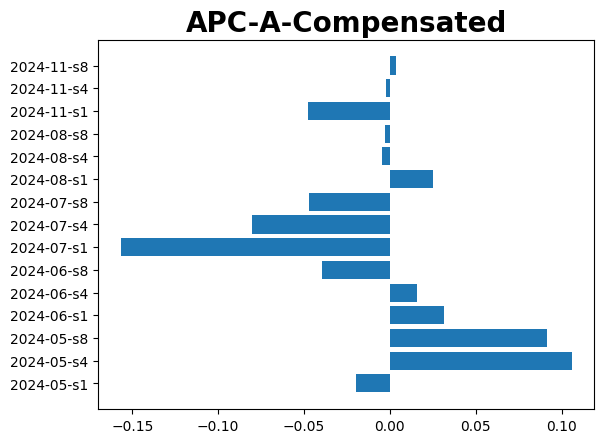

In [46]:
p03_GMM_vis.System_error(diff_dict=result["diff"][0])